# Intermediate Data Visualization with Seaborn

👋 Welcome to your workspace! Here, you can write and run Python code and add text in [Markdown](https://www.markdownguide.org/basic-syntax/). Below, we've imported the datasets from the course _Intermediate Data Visualization with Seaborn_ as DataFrames as well as the packages used in the course. This is your sandbox environment: analyze the course datasets further, take notes, or experiment with code!

In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing course datasets as DataFrames
bike_share = pd.read_csv('datasets/bike_share.csv')
college_data = pd.read_csv('datasets/college_datav3.csv')
daily_show = pd.read_csv('datasets/daily_show_guests_cleaned.csv')
insurance = pd.read_csv('datasets/insurance_premiums.csv')
grants = pd.read_csv('datasets/schoolimprovement2010grants.csv', index_col=0)

college_data.head(2) # Display the first five rows of this DataFrame

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City


## Using Seaborn Styles

### Setting Styles
- Seaborn has default configration that can be applied with `sns.set()`
- These styles can override matplotlib & pandas plots as well.

<AxesSubplot:ylabel='Frequency'>

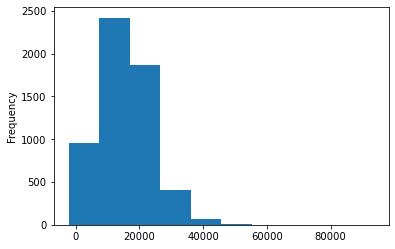

In [2]:
college_data['Tuition'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

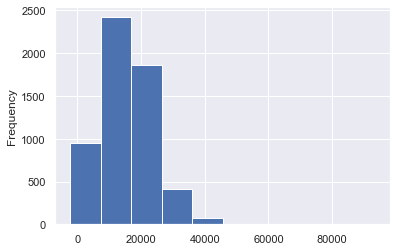

In [3]:
sns.set()
college_data['Tuition'].plot.hist()

### Theme examples with sns.set_style()

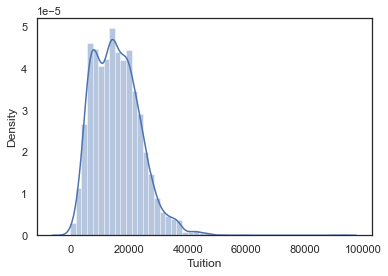

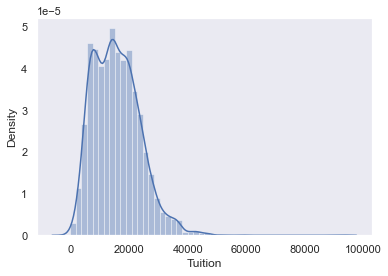

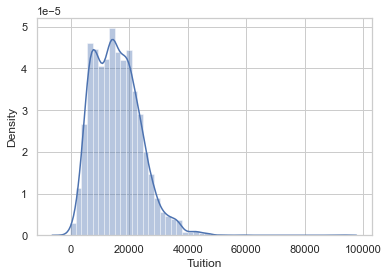

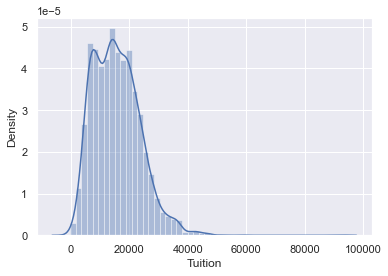

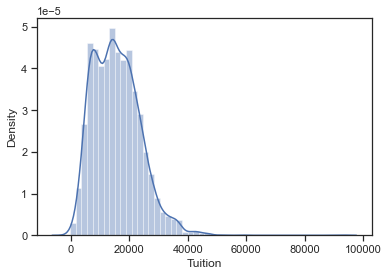

In [6]:
for style in ['white','dark','whitegrid','darkgrid','ticks']:
    sns.set_style(style)
    sns.distplot(college_data['Tuition'])
    plt.show()

### Removing axes with `despine()`
- Sometimes plots are improved by removing elements
- Seaborn contains a shortcut for removing the spines of a plot

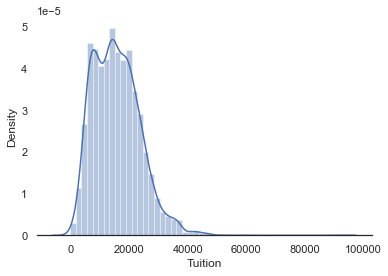

In [7]:
sns.set_style('white')
sns.distplot(college_data['Tuition'])
sns.despine(left=True)

## Colors in Seaborn

### Defining a color for a plot
- Seaborn supports assigning colors to plots using `matplotlib` color codes

<AxesSubplot:xlabel='Tuition', ylabel='Density'>

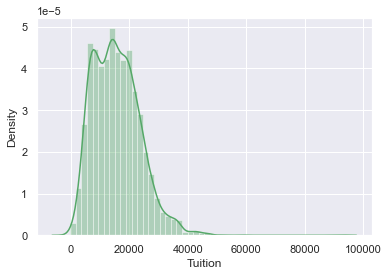

In [9]:
sns.set(color_codes=True)
sns.distplot(college_data['Tuition'], color='g')

### Palettes 
- Seaborn uses the `set_palette()` function to define a palette

In [11]:
sns.palettes.SEABORN_PALETTES.keys()

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])

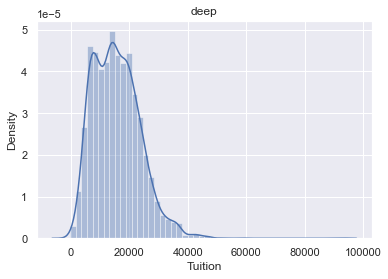

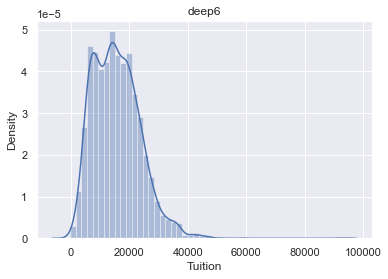

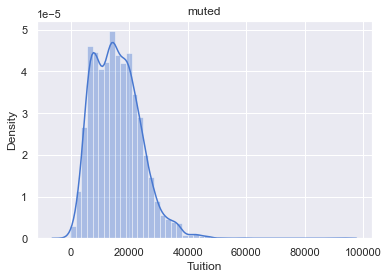

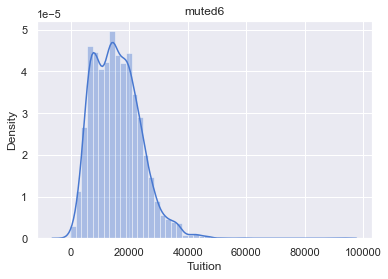

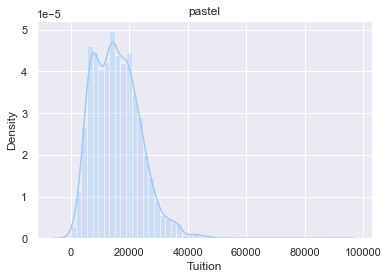

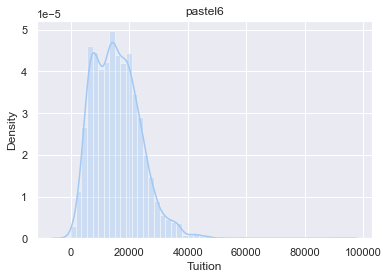

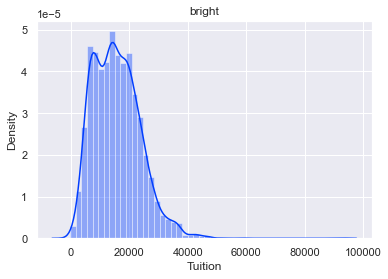

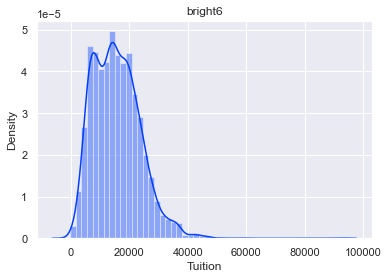

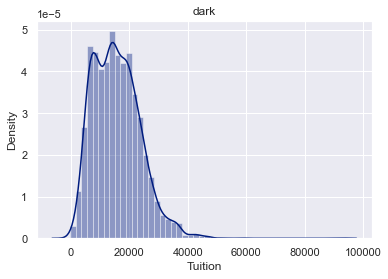

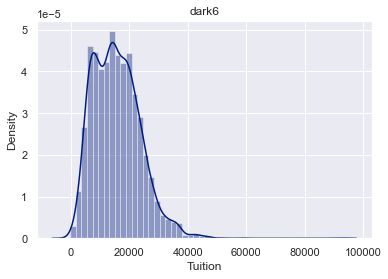

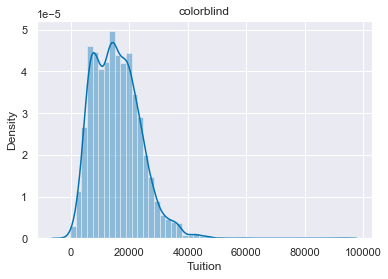

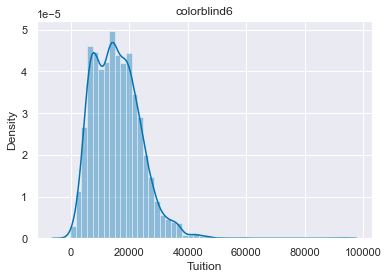

In [15]:
for p in sns.palettes.SEABORN_PALETTES:
#     print(p)
    sns.set_palette(p)
    sns.distplot(college_data['Tuition'])
    plt.title(p)
    plt.show()

### Displaying Palettes
- `sns.palplot()` function displays a palette
- `sns.color_palette()` returns the current palette

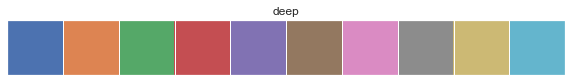

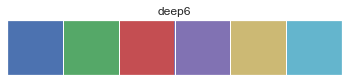

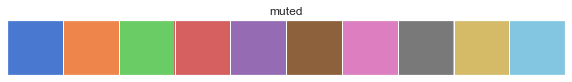

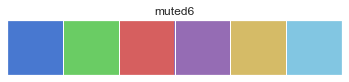

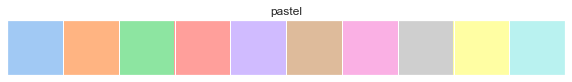

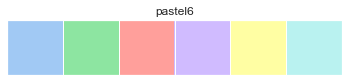

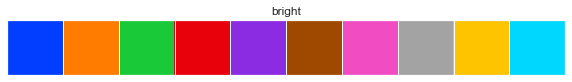

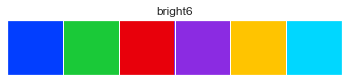

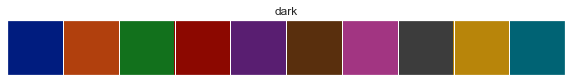

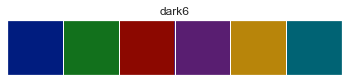

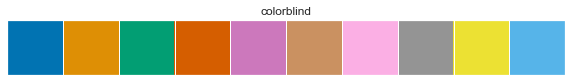

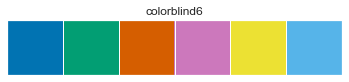

In [17]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.palplot(sns.color_palette())
    plt.title(p)
    plt.show()

### Defining Custom Palettes
- **Circular colors** = when the data is not ordered

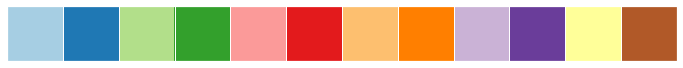

In [21]:
sns.palplot(sns.color_palette("Paired", 12))

- **Sequential colors** = when the data has a consistent range from high to low

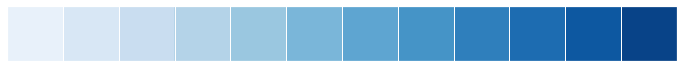

In [22]:
sns.palplot(sns.color_palette("Blues", 12))

- **Diverging colors** = when both the low and high values are interesting

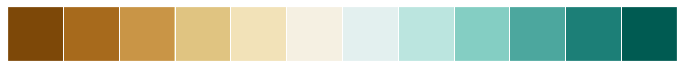

In [23]:
sns.palplot(sns.color_palette("BrBG", 12))

## Customizing with matplotlib

### Matplotlib Axes
- Most customization available through `matplotlib` `Axes` objects
- `Axes` can be passed to seaborn functions

[Text(0.5, 0, 'Tuition 2013-14')]

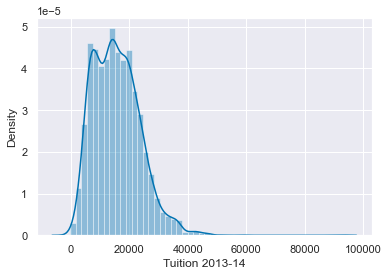

In [24]:
fig, ax = plt.subplots()
sns.distplot(college_data['Tuition'], ax=ax)
ax.set(xlabel="Tuition 2013-14")

### Further Customizations
- The `axes` object supports many common customizations

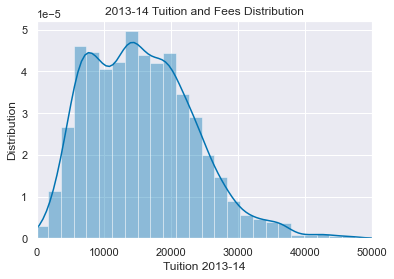

In [25]:
fig, ax = plt.subplots()
sns.distplot(college_data['Tuition'], ax=ax)
ax.set(xlabel="Tuition 2013-14",ylabel="Distribution", xlim=(0, 50000),
title="2013-14 Tuition and Fees Distribution")
plt.show()

### Combining Plots
It is possible to combine and configure multiple plots

In [51]:
college_data.Regions.unique()

array(['South East', 'Far West', 'South West', 'Plains', 'Rocky Mtns',
       'New England', 'Mid East', 'Great Lakes', 'US Service Schools',
       'Outlying'], dtype=object)

In [ ]:
# creating canvas
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,4))

#plotling both plots
sns.distplot(college_data['Tuition'], ax=ax0)
sns.displot(college_data[college_data.Regions == 'South East']['Tuition'], ax=ax1)

#adding details to the ax1 plot
ax1.set(xlabel="Tutuion (MN)", xlim=(0,70000))
ax0.axvline(x=20000, label='My Budget', linestyle='--')
ax0.legend()

## PRACTISE